# Inferential Analysis on Changes in Snow Depth Due to Elevation

## Introduction

During the winter season, many people like to go hit the slopes to have some fun, and even more so in BC as the province is home to many world-renowned skiing destinations. When choosing a location, one of the main factors perceived by many that contribute to a greater skiing experience is the elevation of the mountain, as it’s believed that a higher elevation leads to an increase in snow depth which helps improve one’s skiing experience. This relationship between elevation and snow depth is a popular claim by the public, with one study suggesting a positive correlation between elevation and snow depth and another suggesting a similar proposition up to an elevation of 3300 meters (Grünewald et al., 2014; Kirchner et al., 2014). As skiing hobbyists ourselves, we wanted to set out and investigate whether this claim is statistically significant. We decided to focus on locations within BC for relevancy, and settled on comparing the snow depths captured by automated snow weather stations placed in two locations with a distinct difference in elevation: Callaghan, an area just west of Whistler with an elevation of 1017 meters, and Silver Star Mountain, home to the famous Silver Star Ski Resort elevated at 1839 meters. As such, our question will be: does the higher elevation of Silver Star Mountain have a greater snow depth than the lower elevation of Callaghan?

Our chosen location and scale parameter will be the mean and variance/standard deviation, respectively. Finding the means of the samples allows us to carry out a one-tailed two-sample t-test (difference in means between independent samples) which would be relevant for answering the question, while finding the standard deviations/variances will allow us to observe the variability of the observations in each sample.

We’ll be using two datasets from the BC government containing samples of snow depth in centimetres, captured by snow weather stations located in Callaghan and Silver Star Mountain as previously stated. The datasets will be filtered down to contain observations only in the month of January 2019 for reduced variability in measurements caused by seasonal changes (Ye & Ellison, 2003). The sample sizes for each of the two samples will be determined after data wrangling, and will be clearly stated in our preliminary results section.

## Preliminary Results

Loading necessary libraries:

In [1]:
library(tidyverse)
library(repr)
library(digest)
library(gridExtra)
library(lubridate)
library(broom)
# Install the package
install.packages("infer")
# Load the package
library(infer)

#setting seed to be reproducable
set.seed(276)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



Reading the csv data files from the data folder. Each corresponding csv file from each location is loaded into a different variable.

In [2]:
snow_depth_callaghan <- read.csv(file = 'https://raw.githubusercontent.com/carlosperez67/Stat-201-Project/main/data/Callaghan/SD.csv', col.names = c("Time", "NULL", "SnowDepth"))
snow_depth_silverstar <- read.csv(file = 'https://raw.githubusercontent.com/carlosperez67/Stat-201-Project/main/data/SilverStar/SD.csv', col.names = c("Time", "NULL", "SnowDepth"))

head(snow_depth_silverstar)

,Time,NULL.,SnowDepth
,<chr>,<chr>,<chr>
1,"GRADEDESCRIPTIONS-3=GAP, -2=UNUSABLE, -1=UNSPECIFIED, 0=UNDEF, 11=POOR, 21=ESTIMATED, 25=BEST PRACTICE, 31=GOOD, 41=VERYGOOD, 51=EXCELLENT, APPROVALDESCRIPTIONS 800=WORKING, 900=IN REVIEW, 1200=APPROVED",,
2,Timestamp (UTC),Event Timestamp (UTC),Value (cm)
3,2015-08-13 22:00:00,,0
4,2015-08-13 23:00:00,,5
5,2015-08-14 00:00:00,,-1
6,2015-08-14 01:00:00,,-4


*Figure 1: Dataframe of snow depth at Silver Star, pre-wrangling.*

As you can see from the dataframe above, we must from tidy and wrangle the data.

In [3]:
# For Each DataSet we filter away the Null/NA values. Then we convert the charachter dates to R's built in date object type.
# Next for the snowdepth we filter away the negative snow depths (impossible/instrument error)
snow_depth_silverstar <- snow_depth_silverstar %>%
    filter(!is.na(SnowDepth)) %>%
    mutate(Time = strptime(Time, tz = "GMT", format = "%Y-%m-%d %H:%M:%S"),
          SnowDepth = as.numeric(SnowDepth),
          Location = "SilverStar") %>%
    filter(SnowDepth >= 0, !is.na(SnowDepth)) %>%
    select(Time, SnowDepth, Location)

snow_depth_callaghan <- snow_depth_callaghan %>%
    filter(!is.na(SnowDepth)) %>%
    mutate(Time = strptime(Time, tz = "GMT", format = "%Y-%m-%d %H:%M:%S"),
          SnowDepth = as.numeric(SnowDepth),
          Location = "Callaghan") %>%
    filter(SnowDepth >= 0, !is.na(SnowDepth)) %>%
    select(Time, SnowDepth, Location)

head(snow_depth_silverstar)

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


,Time,SnowDepth,Location
,<dttm>,<dbl>,<chr>
1,2015-08-13 22:00:00,0,SilverStar
2,2015-08-13 23:00:00,5,SilverStar
3,2015-08-14 04:00:00,2,SilverStar
4,2015-08-14 05:00:00,3,SilverStar
5,2015-08-14 06:00:00,2,SilverStar
6,2015-08-14 07:00:00,2,SilverStar


*Figure 2: Data post-wrangling.*

Next lets join all these data sets together. 

In [4]:
snow_data <- rbind(snow_depth_silverstar,snow_depth_callaghan)

As stated in our introduction, the seasons play a decisive role in snow depth and air temperature. Therefore we will only look at data from the month of January, which is conveniently in the dead of the Canadian winter.

In [5]:
jan_data <- snow_data %>%
    filter(as.numeric(strftime(snow_data$Time, "%m")) == 1,
          as.numeric(strftime(snow_data$Time, "%Y")) == 2019,) 

#Adding another column to easily graph the dates on the x-axis
jan_data <- jan_data %>%
    mutate(Date = as.numeric(strftime(jan_data$Time, "%d")))

## Sample Distributions

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



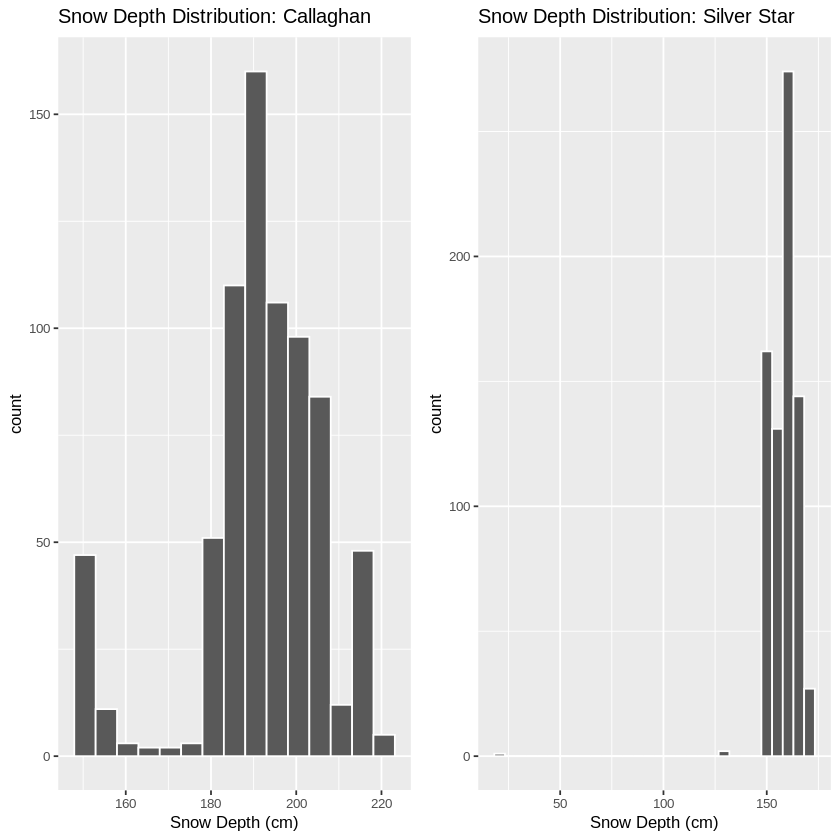

In [8]:
# Plotting Callaghan sample distribution for the month of january
call_sample_dist_plot <-
     jan_data %>% 
    filter(Location == "Callaghan") %>% 
     ggplot() +
     geom_histogram(aes(x=SnowDepth), bins = 15, color="white") +
     xlab("Snow Depth (cm)") + 
     theme(text = element_text(size=10)) + 
     ggtitle("Snow Depth Distribution: Callaghan") 

silv_sample_dist_plot <-
     jan_data %>% 
    filter(Location == "SilverStar") %>% 
     ggplot() +
     geom_histogram(aes(x=SnowDepth), color="white") +
     xlab("Snow Depth (cm)") + 
     theme(text = element_text(size=10)) + 
     ggtitle("Snow Depth Distribution: Silver Star") 

#Displaying Both Histograms Side by Side
grid.arrange(call_sample_dist_plot, silv_sample_dist_plot, ncol=2)

*Figures 3 & 4: Sample distributions of snow depths for Callaghan and Silver Star Mountain.*

Visually, it appears that there is a difference between the Callaghan and Silver Star snow depths. Let's include a boxplot as well for another visualization that may help.

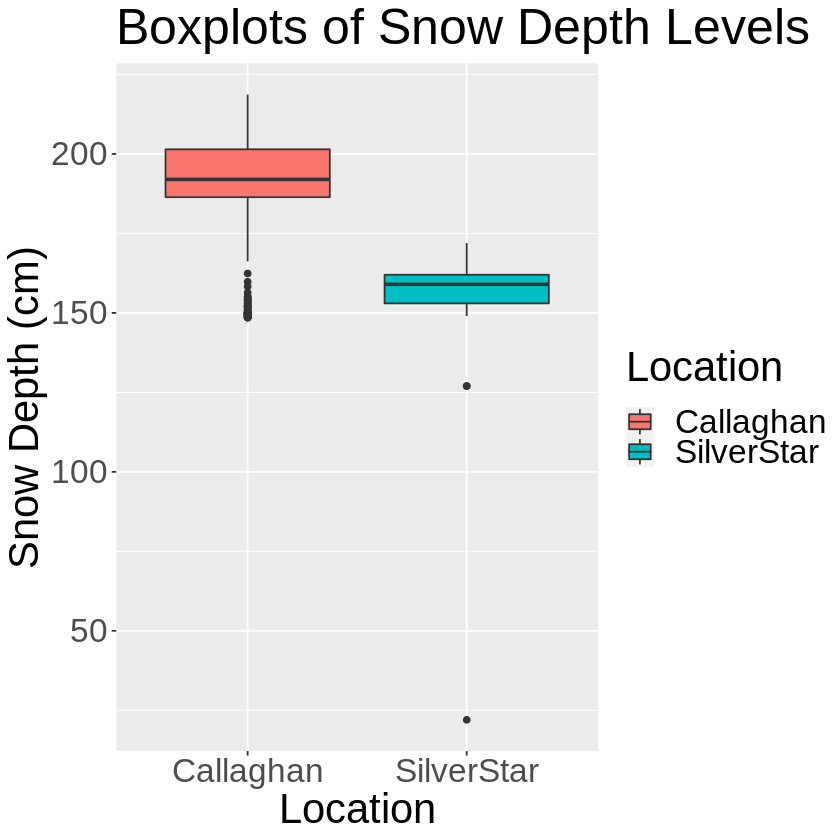

In [15]:
boxplots <- 
    jan_data %>%  
    ggplot(aes(x = Location, y = SnowDepth, fill = Location)) + 
    geom_boxplot() + 
    ylab("Snow Depth (cm)") +
    ggtitle("Boxplots of Snow Depth Levels") +
    theme(text = element_text(size=25))
boxplots

*Figures 5: Boxplot comparing the snow depths between the two mountains.*

Now let's estimate the mean snow depth (cm) for each location for January 2019 by calculating the mean of our samples. We'll also find the sample variances and standard deviations to see the variability within each sample.

In [21]:
jan_2019_summary <- jan_data %>%
    group_by(Location) %>%
    summarize(MeanSnowDepth = mean(SnowDepth),
              sample_var = var(SnowDepth),
              sample_sd = sd(SnowDepth),
              n = n())
jan_2019_summary

Location,MeanSnowDepth,sample_var,sample_sd,n
<chr>,<dbl>,<dbl>,<dbl>,<int>
Callaghan,191.5876,237.3462,15.406043,742
SilverStar,158.2051,58.2903,7.634808,741


*Figure 6: Summary tibble containing sample means, sample variances and the number of observations in each sample.*

There are **742** observations in the Callaghan data and **741** observations in the Silver Star data. Note that we can see the mean snow depth is actually a higher for Callaghan, the mountain with the lower elevation compared to Silver Star, the mountain with higher elevation. Quite interesting, and perhaps a little unexpected.

A couple more things to note. Our sample sizes, though almost the same size, are off by 1. However, the sample variances are definitely very different from each other, which may affect the validity of our findings. More elaboration in the discussion section.

## Methods: Plan and Results

From our preliminary results, we see that the mean snow depth for Callaghan is actually greater than Silver Star, so based on that we can expect to find that a higher elevation does not lead to greater snow depth. However, we shouldn't change our expectations based on this and instead stay true to our original intentions of this study, which is to examine if higher elevation leads to more snow depth. As such, we’ll state the null hypothesis to be that there’s no difference between the mean snow depths of Silver Star and Callaghan and our alternate hypothesis to be that the difference between Silver Star and Callaghan snow depths is greater than zero (ie. mean snow depth of Silver Star is greater than mean snow depth of Callaghan). We will perform the hypothesis testing by calculating the t-score by doing a two-sample t-test.

We will also calculate the confidence intervals through asymptotic methods (normal distribution, CLT assumptions) to evaluate the accuracy of our estimates. If our expected findings are correct, then we can also expect not to reject the null hypothesis. Based on our expected findings, if higher elevation does not lead to greater snow depth, then more questions could be raised on why this is, such as the geography/location of the mountains playing a larger role in snow depth. Our expected conclusions could also help future companies/wealthy investors evaluate new locations for ski resorts, knowing whether elevation is or isn't a big factor in ensuring sufficient snow depth for a good skiing experience.


### CLT Based Confidence Interval Calculations

Now let's calculate the confidence intervals based on the assumptions of CLT. First, let's make sure CLT is applicable in our situation:
- Are the sample sizes large enough? Yes, our sample sizes are large enough. We do not know how the true population distribution may look like for each mountain, but examining the sample distributions suggests that it may not be normal. However, this is okay since our sample sizes for both samples are very large
- Were the samples taken in an independent fashion? Yes
- Is the estimator being used a sum of random components? Yes, as we're finding the difference in  means, and means are a sum of random components.

Now that we know CLT can be applied, let's find the 95% confidence interval for the difference in means between Silver Star and Callaghan snow depth. We chose 95% as that is a common/reputable number often used in academia. Lowering our confidence interval would give us a narrower and more precise interval, but consequently there is less confidence the interval will contain the population parameter we are trying to find.

In [22]:
callaghan_var <- jan_2019_summary$sample_var[1]
silverstar_var <- jan_2019_summary$sample_var[2]

callaghan_n <- jan_2019_summary$n[1]
silverstar_n <- jan_2019_summary$n[2]

In [23]:
standard_error_2_sample <- sqrt(callaghan_var / callaghan_n + silverstar_var / silverstar_n)
differece_in_means = jan_2019_summary$MeanSnowDepth[2] - jan_2019_summary$MeanSnowDepth[1]

#Finding the 95% Confidence Interval

two_sample_ci <- tibble (
                    lower_ci = differece_in_means - qnorm(0.975) * sqrt(silverstar_var/silverstar_n + callaghan_var/callaghan_n),
                    upper_ci = differece_in_means + qnorm(0.975) * sqrt(silverstar_var/silverstar_n + callaghan_var/callaghan_n))

two_sample_ci

lower_ci,upper_ci
<dbl>,<dbl>
-34.6198,-32.14515


*Figure 7: CLT Theory obtained confidence interval.*

So here we observe that the 2 sample difference in means has a confidence interval of -34.6198 to -32.14515. If we were to repeat this process of calculating the intervals with different samples, we would expect that 95% of the total intervals would contain the true population parameter (the difference in means).

### Hypothesis Testing: One-Sided Two-Sample T-Test

For this hypothesis test, we need to ensure that our two samples are independent. This case is true because the snow depth at Callaghan has no effect on the snow depth on SilverStar. Also, we'll test at a 0.05 significance level.

We need to rely on the CLT because as seen earlier, our population is not normally distributed. This is because the CLT states that the sampling distribution of the sample average will eventually converge into the normal distribution. 

If our sample size is large enough the T-Distribution will converge to $t_{n-1}$ under the null hypothesis.

Our Hypothesis will be: $$H_0: \mu_{\text{SilverStar}} - \mu_{\text{Callaghan}} = 0$$ $$H_1: \mu_{\text{SilverStar}} - \mu_{\text{Callaghan}} > 0$$

and we will use this test statistic:
$$
T = \frac{\bar{x}_{\text{SilverStar}} - \bar{x}_{\text{Callaghan}}}{\sqrt{\frac{s^2_{\text{SilverStar}}}{n_1}+\frac{s^2_{\text{Callaghan}}}{n_2}}}
$$

Where $\bar{x}_{\text{SilverStar}}$ and $\bar{x}_{\text{Callaghan}}$ are the sample means of snow depth for SilverStar and Callaghan mountains, respectively; $s^2_{\text{SilverStar}}$ and $s^2_{\text{Callaghan}}$ are the sample variances for the SilverStar and Callaghan mountains, respectively; and $n_1$ and $n_2$ are the sample size for SilverStar and Adelie mountains, respectively. 

In [24]:
# Here R does all the heavy lifting for us, in terms of calculating the test
# statistic and calculating the p-value
t_test <-
    tidy(
        t.test(x = filter(jan_data, Location == "SilverStar")$SnowDepth,
               y = filter(jan_data, Location == "Callaghan")$SnowDepth,
               alternative = "greater")) 

#greater because alternate hypothesis is that higher elevation results in more snow depth


t_test


estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
-33.38247,158.2051,191.5876,-52.87906,1,1084.59,-34.42175,Inf,Welch Two Sample t-test,greater


*Figure 8: Two-Sample T-Test Results.*

Based on the results above, we can see that we've obtained a p-value of 1. As such, we can conclude at the 0.05 significance level that we will not reject the null hypothesis.

## Discussion

In our project, we first cleaned and wrangled the data, then made some visualizations of the samples and calculated some preliminary values like the sample means and variances. Then we determined the confidence intervals based on the CLT. Finally, we conducted our hypothesis test using a one-sided two-sample t-test, and found that at a 0.05 significance level we should not reject the null hypothesis. This is consistent with what we expected to find based on the preliminary results.

Firstly, when calculating the confidence intervals, we decided against calculating them through bootstrapping. Although stated in the project instructions, we felt that it would be unnecessary to do so for sake of comparison with the CLT approach. Because our samples are independent, we would have to find two separate bootstrap distributions and overlap them together to find the intervals, and we felt it was just unnecessary to do in the scope of this project.

Now for some further discussion on our p-value of 1. We could accept these results and conclude that mountain elevation has no effect on the amount of snow depth, but we believe there are some factors in our findings that pose some doubt. Let's first talk about the validity of our tests. As noted previously, our sample sizes are actually not exactly the same, and our sample variances are far off from each other. This may have an effect on the power of our tests, and may suggest some errors. Another possibility is that our assumptions and background research are not extensive enough, ie. there may be other factors in play that affect snow depth more so than the mountain elevations. One such possibility is that our geographical locations are not in close enough proximity that the climate/weather patterns are not similar.  Perhaps the air pressure or moisture levels are affecting snow depth too, or the larger volume of human activity at Silver Star may be affecting the snow depth unintentionally.

Nonetheless, we still believe our findings can offer some value to future research/questions. Those who accept our findings may perhaps perform more research into other factors that may affect snow depth. Future companies/wealthy investors can also evaluate new locations for ski resorts, knowing that elevation isn't a big factor in ensuring sufficient snow depth for a good skiing experience.

## References

Grünewald, T., Bühler, Y., & Lehning, M. (2014). Elevation dependency of mountain snow depth. The Cryosphere, 8(6), 2381–2394. https://doi.org/10.5194/tc-8-2381-2014

Kirchner, P. B., Bales, R. C., Molotch, N. P., Flanagan, J., & Guo, Q. (2014). LiDAR measurement of seasonal snow accumulation along an elevation gradient in the southern Sierra Nevada, California. Hydrology and Earth System Sciences, 18(10), 4261–4275. https://doi.org/10.5194/hess-18-4261-2014

Ye, H., & Ellison, M. (2003). Changes in transitional snowfall season length in northern Eurasia: TRANSITIONAL SNOWFALL SEASON. Geophysical Research Letters, 30(5), n/a-n/a. https://doi.org/10.1029/2003GL016873


### Data Sources

Government of British Columbia. (2022) Callagan Telementary. https://aqrt.nrs.gov.bc.ca/Data/Location/Summary/Location/3A20P/Interval/Latest

Government of British Columbia. (2022) Silver Star Mountain  Telementary. https://aqrt.nrs.gov.bc.ca/Data/Location/Summary/Location/2F10P/Interval/Latest